In [ ]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob  import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
access_token='MY_ACESS_TOKEN'  
access_token_secret='ACCESS_TOKEN_SECRET_KEY'

consumer_key='CONSUMER_KEY'
consumer_secret='CONSUMER_SECRET' 

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

we need to provide our ACESS_TOKEN,ACCESS_TOKEN_SECRET_KEY,CONSUMER_KEY,CONSUMER_SECRET password to access developer account in tweeter.tweeter will then provide tweeter handler by which we can extract tweets from our tweeter account and explore various functionalies using tweeter APIs 

In [ ]:
public_tweets=api.home_timeline()
for tweet in public_tweets:
  print(tweet.text)

sample bhin  tweet hi about using #python and #tweepy packages
RT @classcentral: [New Course] Data Science Ethics by H Jagadish from University of Michigan (@UMichOnline) on FutureLearn https://t.co/GFS…
We're #hiring! Join our team and help shape the future of learning at @UMich! Learn more and apply at… https://t.co/oAY8r75Fty
What happens when you are building a new @SakaiLMS feature to support an emergent @LearningImpact specification and… https://t.co/zIbQgW8jFY
HOW TO EASILY FIND BAD CHRISTMAS LIGHT BULBS https://t.co/U7JySJYvVh via @YouTube
RT @PawlowskiMario: The 4th #industrial revolution is here, and it's #transforming the way we live and #FutureofWork

MT @BernardMarr @Haro…
Hey, @Umich Faculty! Did you know? We're seeking proposals to support learners in India with @coursera. Learn more.… https://t.co/tZDt8HhE8h
We're currently seeking a qualified Partnership Manager to identify and explore new opportunities and partnerships… https://t.co/qBUHlv8JUT
We're inviting faculty t

In [ ]:
user=api.get_user('@andy')
print("user screen name")
print(user.screen_name)
print("user followers count")
print(user.followers_count)

user screen name
Andy
user followers count
2371568


here api.get_user Returns information about the specified user. user.screen_name Specifies the screen name of the user. Helpful for disambiguating when a valid screen name is also a user ID.   Returns a user’s followers count ordered in which they were added. If no user is specified by id/screen name, it defaults to the authenticated user.

In [ ]:
for friend in user.friends():
  print(friend.screen_name)

TiffanyMoonMD
melissamccarthy
_DionneWarwick
CoriBush
bejohnce
JoeBiden
Mary_M_Cosby
SuttonBStracke
MeredithMarks0
heathergay29
TheRealJenShah
whitneywildrose
LisaBarlow7
DrBiden
staceyabrams
NateSilver538
TylerDinucci
Hollywood_Pop
John_Henson
IzzyTheFrenchie


Returns a user’s friends ordered in which they were added 100 at a time. If no user is specified it defaults to the authenticated user.



In [ ]:
for followers in user.followers():
  print(followers.screen_name)

olinzock_kim
l_loser_r
nikilyn42820587
HoneyBunchezz
MereGinsbach
loko_laflare
Patti40534863
Jenny26218496
Deniz___Ay
FordTerisha
Sadie_Dallinger
VitaHansen18
TheVault23
ElaineR26616130
lc_mccauley
catygreen
jamiellynch1
teddytweets8
Katelynisch
Tripilay


screen_name – Specifies the screen name of the user. Helpful for disambiguating when a valid screen name is also a user ID.

In [ ]:
api.update_status("sample bhin  tweet bhi about using #python and #tweepy packages")

Status(_api=<tweepy.api.API object at 0x7f709485a5c0>, _json={'created_at': 'Sun Dec 06 04:44:30 +0000 2020', 'id': 1335444983365644289, 'id_str': '1335444983365644289', 'text': 'sample bhin  tweet bhi about using #python and #tweepy packages', 'truncated': False, 'entities': {'hashtags': [{'text': 'python', 'indices': [35, 42]}, {'text': 'tweepy', 'indices': [47, 54]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://www.linkedin.com/in/anand-mohan-12668a21/" rel="nofollow">andyemb</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150566254, 'id_str': '150566254', 'name': 'ANAND MOHAN', 'screen_name': 'MBA_ANALYTICS', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 10, 'friends_count': 5, 'listed_count': 0, 'created_at': 'Tue Jun 01 07:28:51 +000

Updates the authenticating user’s current status, also known as Tweeting.

For each update attempt, the update text is compared with the authenticating user’s recent Tweets. Any attempt that would result in duplication will be blocked, resulting in a 403 error. A user cannot submit the same status twice in a row.

While not rate limited by the API, a user is limited in the number of Tweets they can create at a time. If the number of updates posted by the user reaches the current allowed limit this method will return an HTTP 403 error.

In [ ]:
#PULL TWEETS BY SEARCH WORDS
tweets=tw.Cursor(api.search,q='ramayan-filter:retweets',lang="en",since='2019-04-01').items(1000)

Returns a collection of top 1000 relevant Tweets matching a specified query which is ramayan-filter:retweets over here over the period since 2019-04-01 in english language

Twitter’s search service and, by extension, the Search API is not meant to be an exhaustive source of Tweets. Not all Tweets will be indexed or made available via the search interface.

In API v1.1, the response format of the Search API has been improved to return Tweet objects more similar to the objects you’ll find across the REST API and platform. However, perspectival attributes (fields that pertain to the perspective of the authenticating user) are not currently supported on this endpoint.

In [ ]:
tweets_text=[x.text for x in tweets]
tweets_text[0:20]

['@SamTalwalkar @ajaypannu21 @TajinderBagga Hinduism and Sikhism are from the same dharma. This is a beautiful take o… https://t.co/Ufp5tFfIip',
 'I remember when my family got out of financial crisis , my father did akhand ramayan and  bhandara , i was a small… https://t.co/9wlGHC6mYv',
 '@just_bhakt @tathasthuu @urmisgr8 @UnSubtleDesi Muslims do mind what happnd with ramayan. may be u 2 wud mind what… https://t.co/71l2Xt1ir5',
 '@DrRPNishank keep these 4 books in our education system see how nation develops in all aspects :\n\n1. Ramayan: For m… https://t.co/X5cJlXlvIC',
 "@ramkadam @omraut Director @omraut look at it as a request or warning whatever. But don't play with the emotions of… https://t.co/SZEb7XkRUO",
 "@ramkadam Director @omraut look at it as a request or warning whatever. But don't play with the emotions of Ram Bha… https://t.co/tV4lE42MUD",
 'These Sanghies of Monkeys believe in Mystic mystical Mythological stories Such as Ramayan and Mahabharat. But never… https://t.c

In [ ]:
#PULL TWEETS BY SEARCH WORDS
tweets=tw.Cursor(api.search,q='bigbasket-filter:retweets',lang="en",since='2019-04-01').items(1000)

Returns a collection of top 1000 relevant Tweets matching a specified query which is bigbasket-filter:retweets over here over the period since 2019-04-01 in english language

In [ ]:
tweets_text=[x.text for x in tweets]
tweets_text[0:20]

["@deed1_2  Thank you for highlighting this to us, be assured we've escalated the issue with our relevant team and wi… https://t.co/iLsI6pdeo5",
 '@bigbasket_com Yeah 19 minutes more',
 '@arorasid  We promise to sort out the issue at the earliest. Be rest assured, Siddharth.',
 'BigBasket guys put my ParleG biscuits on the very bottom of the contact-less delivery bag and proceeded to toss 12… https://t.co/Yx5DG5etcB',
 '@bigbasket_com Yeah 21 minutes left now...',
 '@bigbasket_com there is bug in your application. Some items are displayed as available but when you actually checko… https://t.co/mzgXM84ULw',
 '@bigbasket_com So to get my money back, I have to waste time again and again... https://t.co/1wieCQ2GiQ',
 '@arorasid  The needful will be done at the earliest. Kindly spare us some time.',
 '@bigbasket_com Ok.... time given for next 22 minutes, give me refund by 10am and delete my account',
 "@arorasid  We understand the dismay expressed here, Siddharth. As stated, we'll definitel

In [ ]:
len(tweets_text)

1000

In [ ]:
print(tweets_text[0])
print(tweets_text[7])

@deed1_2  Thank you for highlighting this to us, be assured we've escalated the issue with our relevant team and wi… https://t.co/iLsI6pdeo5
@arorasid  The needful will be done at the earliest. Kindly spare us some time.


In [ ]:
#PULL TWEETS BY HASHTAGS
tweets=tw.Cursor(api.search,q='#miband4-filter:retweets',lang="en",since='2019-04-01').items(10)

Tags can be used to segregate rules and their matching data into different logical groups. If a rule tag is provided, the rule tag is included in the ‘matching_rules’ attribute. It is recommended to assign rule-specific UUIDs to rule tags and maintain desired mappings on the client side.

In [ ]:
tweets_text=[tweet.text for tweet in tweets]
tweets_text[0:20]

['My routes\nDay 27\n\n#workout\n#sweatitout\n#workoutmotivation \n#workoutathome \n#walking \n#bodytransformation… https://t.co/jCX9akIzKt',
 'My routes\nDay 26\n\n#workout\n#sweatitout\n#workoutmotivation \n#workoutathome \n#walking \n#bodytransformation… https://t.co/RLgSRXA7Lh',
 'My routes\nDay 25\n\n#workout\n#sweatitout\n#workoutmotivation \n#workoutathome \n#walking \n#bodytransformation… https://t.co/xS6rjNHFtc',
 'My routes\nDay 24\n\n#workout\n#sweatitout\n#workoutmotivation \n#workoutathome \n#walking \n#bodytransformation… https://t.co/qVj9sqjqs4',
 'November was a strong month, again. Even though there were some painful days, it was mostly smooth sailing overall.… https://t.co/AHzNqY398V',
 'My routes\nDay 23\n\n#workout\n#sweatitout\n#workoutmotivation \n#workoutathome \n#walking \n#bodytransformation… https://t.co/A6iQasK6hn',
 'Flipkart #FlipstartDays Sale: Exciting deals on smartwatches and smartbands \n#HonorBand5 #HonorBand6 #MiBand4 \nhttps://t.co/wESjLceBBr',
 'My

In [56]:
tweets=tw.Cursor(api.search,q='#iphone-filter:retweets',lang="en",since='2019-04-01').items(1000)
users=[[tweet.user.screen_name,tweet.user.location] for  tweet in tweets]
users[0:20]

[['gc8032', 'गांधीनगर, भारत'],
 ['moneycontrolcom', 'Mumbai'],
 ['cybertechbiz', 'Virginia, US'],
 ['OmmcomNews', 'Bhubaneshwar, India'],
 ['calligraphyhd', 'England, United Kingdom'],
 ['dynamicportrai1', 'Ticino, Switzerland'],
 ['standard3d', 'Toronto, Ontario'],
 ['bitcoinconnect', ''],
 ['sarahabbie22', 'Halifax, Nova Scotia'],
 ['realmethod41', 'U.S.A.'],
 ['NextTelcom', 'Nairobi, Kenya'],
 ['NcsVentures', 'Atlanta, GA'],
 ['TheNateJamShow', 'Texas'],
 ['TheGameLoop', ''],
 ['mvollmer1', 'Frankfurt, Germany'],
 ['bitcoinconnect', ''],
 ['GamersarIo', ''],
 ['rasmiranjanbabu', 'United States'],
 ['TheDailyPioneer', ''],
 ['dynamicportrai1', 'Ticino, Switzerland']]

In [ ]:
location=pd.DataFrame(data=users,columns=['screen_Name','location'])
location

,screen_Name,location
0,iam_sureshnaik,"Anantapur, India"
1,dynamicportrai1,"Ticino, Switzerland"
2,jirotomoton,
3,bitcoinconnect,
4,LexAfficial,"London, KY"
...,...,...
995,techsutram,"Pune, India"
996,dynamicportrai1,"Ticino, Switzerland"
997,SirStevenRice,"Charlotte, NC"
998,kolbyster,


FIND USER AND LOCATION INFO

In [ ]:
tweets=tw.Cursor(api.search,q='india-economy-filter:retweets',lang="en",since='2019-04-01').items(1000)
tweets_text=[tweet.text for tweet in tweets]

Returns a collection of top 1000 relevant Tweets matching a specified query which is india-economy-filter:retweets over here over the period since 2019-04-01 in english language

In [ ]:
len(tweets_text)
tweets_text[0:5]

['India is #FoodSovereign the largest food economy with 60% of our people our #Annadatas feeding 1.3 billion. Kissing… https://t.co/jm25MUIM2e',
 '@kaushikcbasu In India we boycott everything which does not suit our ideology .. Ironically the boycotts are funded… https://t.co/fGo1jWOzGy',
 '@rashtrapatibhvn @UN_PGA @UN  @AgriGoI @MEAIndia\nI am also the daughter of a farmer. "Farmer\'s Bill"\nGood for farme… https://t.co/dhd3tPtGDY',
 '@AJ_LKO @pralayhazra @dancingdonkey3 @AnandzWorld @kaushikcbasu Indian economy was the fastest growing economy for… https://t.co/taZ5CAMLue',
 '@homerj007 Terrible. The farm bills passed by the Indian Government are good, they support a free market economy. S… https://t.co/O6TxbPnRp6']

In [ ]:
tweets_df=pd.DataFrame(tweets_text,columns=["tweets"])
tweets_df.head()

,tweets
0,India is #FoodSovereign the largest food econo...
1,@kaushikcbasu In India we boycott everything w...
2,@rashtrapatibhvn @UN_PGA @UN @AgriGoI @MEAInd...
3,@AJ_LKO @pralayhazra @dancingdonkey3 @AnandzWo...
4,@homerj007 Terrible. The farm bills passed by ...


In [ ]:
tweets_df.tail()

,tweets
995,"""New Delhi, too, has in the past commented on ..."
996,We have been witnessing the surge in demand fo...
997,Found this edition of #CutTheClutter by @Shekh...
998,Meaning of new india is destroying the growth ...
999,So its also a systemic problem. The government...


In [ ]:
tweets_df.describe()

,tweets
count,1000
unique,941
top,Meaning of new india is destroying the growth ...
freq,57


snowballing of tweets_df to display the top 5 tweets and last 5 tweets.also we can find unique tweets,count of number of tweets and other details using tweets_df.describe()

In [ ]:
tweets_df.to_csv("tweets.csv")

In [ ]:
corpus=[] #form an empty list called corpus
stemmer = PorterStemmer() #for stemming the words to original form ,for example running to run
stop_words=set(stopwords.words("english"))#remove words such as will,I,and ,at etc.
for i in range(0,1000): #iterate through the list of 1000 tweets
  tweets_text_cln=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]",' ',tweets_text[i])
  tweets_text_cln=re.sub(r'^https?:\/\/.*[\r\n]*', '', tweets_text_cln, flags=re.MULTILINE)
  tweets_text_cln=re.sub(r'^http?:\/\/.*[\r\n]*', '', tweets_text_cln, flags=re.MULTILINE)
  tweets_text_cln=stemmer.stem(tweets_text_cln)
  tweets_text_cln=tweets_text_cln.lower()
  tweets_text_cln=tweets_text_cln.split()
  tweets_text_cln=[x for x in tweets_text_cln if not x in stop_words]
  tweets_text_cln=[x for x in tweets_text_cln if  len(x) > 3]
  tweets_text_cln=" ".join(tweets_text_cln)
  corpus.append(tweets_text_cln)


In [ ]:
corpus[0:5]

['india foodsovereign largest food economy people annadatas feeding billion kissing',
 'india boycott everything suit ideology ironically boycotts funded',
 'also daughter farmer farmer bill good farme',
 'indian economy fastest growing economy',
 'terrible farm bills passed indian government good support free market economy']

derived my corpus from the tweets_text after performing few manipulation operations on them.

In [ ]:
bagofwords=[]
for i in range(0,1000):
  words=corpus[i].split()
  bagofwords.append(words)
bagofwords[0:5]

[['india',
  'foodsovereign',
  'largest',
  'food',
  'economy',
  'people',
  'annadatas',
  'feeding',
  'billion',
  'kissing'],
 ['india',
  'boycott',
  'everything',
  'suit',
  'ideology',
  'ironically',
  'boycotts',
  'funded'],
 ['pga', 'also', 'daughter', 'farmer', 'farmer', 'bill', 'good', 'farme'],
 ['lko', 'indian', 'economy', 'fastest', 'growing', 'economy'],
 ['terrible',
  'farm',
  'bills',
  'passed',
  'indian',
  'government',
  'good',
  'support',
  'free',
  'market',
  'economy']]

In [ ]:
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("most commonly occuring words abd frequency\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['india', 'foodsovereign', 'largest', 'food', 'economy', 'people', 'annadatas', 'feeding', 'billion', 'kissing']

most commonly occuring words abd frequency



[('india', 631),
 ('economy', 542),
 ('farmers', 225),
 ('agriculture', 100),
 ('backbone', 92),
 ('growth', 88),
 ('new', 87),
 ('must', 81),
 ('stand', 80),
 ('therefore', 78),
 ('welfare', 77),
 ('destroying', 72),
 ('insure', 69),
 ('indian', 68),
 ('dmkwithfarmers', 67),
 ('meaning', 66),
 ('modi', 47),
 ('amp', 46),
 ('china', 41),
 ('recovery', 37)]

Derived bag of words and also determined most commonly occuring words and frequency of occurence of those words.

In [ ]:
words_to_remove=['india','economy','indian','much','amp']

In [ ]:
#Bag of words
docs = freq_word_df.words
#Identify the unique words
###For eack row, tokenize
unique_words = []
for row in docs:
    tokens = row.split()
    for token in tokens:
        if token in unique_words:
            pass
        else:
            unique_words.append(token)
print(unique_words)          

bow = []
for row in docs:
    doc_to_bow = []
    tokens = row.split()
    for word in unique_words:
        if word in tokens:
            doc_to_bow.append(1)
        else:
            doc_to_bow.append(0) 
    bow.append(doc_to_bow)
print(docs)
print(bow)

['farmers', 'agriculture', 'backbone', 'growth', 'new', 'must', 'stand', 'therefore', 'welfare', 'destroying', 'insure', 'dmkwithfarmers', 'meaning', 'modi', 'china', 'recovery', 'finance', 'country', 'council', 'pandemic']
0            farmers
1        agriculture
2           backbone
3             growth
4                new
5               must
6              stand
7          therefore
8            welfare
9         destroying
10            insure
11    dmkwithfarmers
12           meaning
13              modi
14             china
15          recovery
16           finance
17           country
18           council
19          pandemic
Name: words, dtype: object
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1,

In [ ]:
bagofwords_new=[[x for x in word if not x in words_to_remove]for word in bagofwords]
bagofwords_new[0:5]

[['foodsovereign',
  'largest',
  'food',
  'people',
  'annadatas',
  'feeding',
  'billion',
  'kissing'],
 ['boycott',
  'everything',
  'suit',
  'ideology',
  'ironically',
  'boycotts',
  'funded'],
 ['pga', 'also', 'daughter', 'farmer', 'farmer', 'bill', 'good', 'farme'],
 ['lko', 'fastest', 'growing'],
 ['terrible',
  'farm',
  'bills',
  'passed',
  'government',
  'good',
  'support',
  'free',
  'market']]

Derived my bag of words after identifying words to remove from my collections of original bag of words.

In [ ]:
all_words=list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("MOST COMMONLY OCCURING WORDS AND FREQUENCY\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['foodsovereign', 'largest', 'food', 'people', 'annadatas', 'feeding', 'billion', 'kissing', 'boycott', 'everything']

MOST COMMONLY OCCURING WORDS AND FREQUENCY



[('farmers', 225),
 ('agriculture', 100),
 ('backbone', 92),
 ('growth', 88),
 ('new', 87),
 ('must', 81),
 ('stand', 80),
 ('therefore', 78),
 ('welfare', 77),
 ('destroying', 72),
 ('insure', 69),
 ('dmkwithfarmers', 67),
 ('meaning', 66),
 ('modi', 47),
 ('china', 41),
 ('recovery', 37),
 ('finance', 35),
 ('country', 34),
 ('council', 34),
 ('pandemic', 33)]

In [ ]:
freq_word_df=pd.DataFrame(words_freq.most_common(20),columns=['words','freq'])
freq_word_df.head()

,words,freq
0,farmers,225
1,agriculture,100
2,backbone,92
3,growth,88
4,new,87


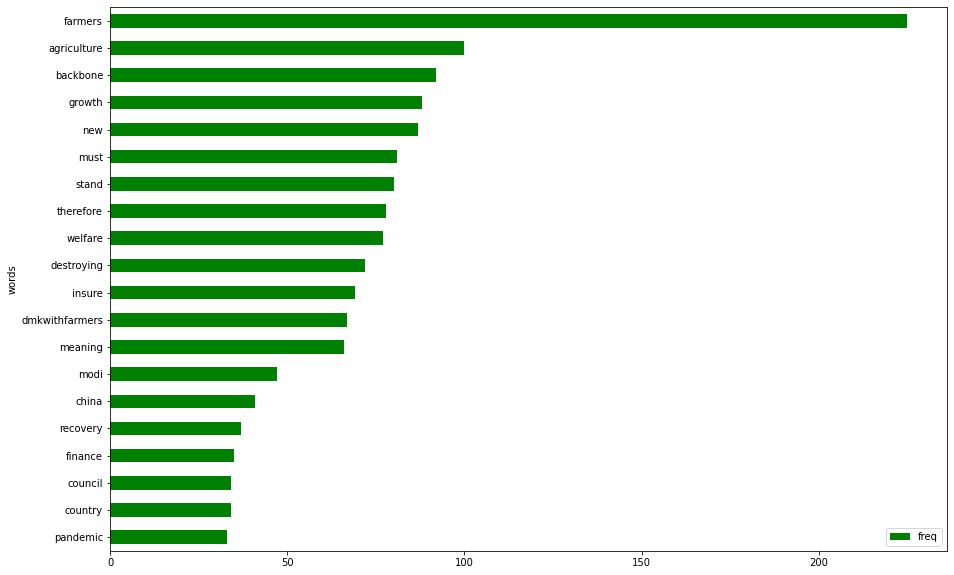

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='freq').plot.barh(x='words',y='freq',ax=ax,color='green')
plt.show()

executed a bar plot describing TOP 20 MOST COMMON WORDS and their frequency of occurences.

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(freq_word_df.words)
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black',max_words=50).generate(word_string)

In [ ]:
plt.figure(figsize=(25,50))
plt.clf()

<Figure size 1800x3600 with 0 Axes>

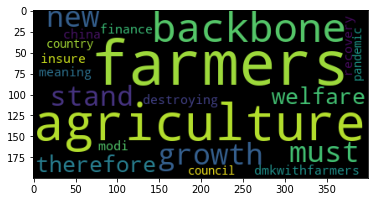

In [ ]:
plt.imshow(wordcloud)

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document.plotted a wordcloud for my word_string.

In [ ]:
!jupyter nbconvert MODULE5_DAY3_TWEETER_TEXT_ANALYSIS_TWEEPY_PKG.ipynb

[NbConvertApp] Converting notebook MODULE5_DAY3_TWEETER_TEXT_ANALYSIS_TWEEPY_PKG.ipynb to html
[NbConvertApp] Writing 495429 bytes to MODULE5_DAY3_TWEETER_TEXT_ANALYSIS_TWEEPY_PKG.html
